In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import math
from sklearn.cluster import DBSCAN
plt.style.use('dark_background')

In [223]:
img = cv.imread('Screenshot_2023-03-31_at_16.33.46.png', cv.IMREAD_GRAYSCALE)
# pat_given = cv.imread('templates/1.png', cv.IMREAD_GRAYSCALE)

In [170]:
# plt.figure(figsize=(25, 20))
# plt.grid(True)
pat = img[345:365, 353:370].copy()

In [171]:
pat_left = img[364:380, 645:659].copy()

In [172]:
pat_right = img[360:380, 215:235].copy()

In [16]:
COEF = 2.1
blur, sigx = 3, 2

In [115]:
img4 = cv.imread('templates/4.png', cv.IMREAD_GRAYSCALE)

In [116]:
img4 = cv.resize(img4[98:130, 75:115], (int(round(img4.shape[1] / COEF)), int(round(img4.shape[0] / COEF))))
img4 = cv.GaussianBlur(img4, (blur, blur), sigx)
plt.imsave('t4.png', img4)

In [136]:
img_n = 4
img = cv.imread(f'templates/{img_n}.png', cv.IMREAD_GRAYSCALE)

In [133]:
img = cv.resize(img_, (int(round(img_.shape[1] / COEF)), int(round(img_.shape[0] / COEF))))
img = cv.GaussianBlur(img, (blur, blur), sigx)
plt.imsave(f't{img_n}.png', img)

In [172]:
matches = []
for c in contours_blueprint:
    # Use the matchShapes function which compares the shapes of the contours
    match = cv.matchShapes(contour_template, c, cv.CONTOURS_MATCH_I1, 0.0)
    if match < 0.01:  # This threshold might need to be adjusted
        # If the match is close enough, we get the bounding box of the contour in the blueprint
        x, y, w, h = cv.boundingRect(c)
        matches.append((x, y, w, h))

In [173]:
len(matches)

36

In [174]:
matches = np.array(matches)

In [175]:
for m in matches:
    x, y, w, h = m
    cv.rectangle(img, (x, y), (x+w, y+h), 255, 4)

In [224]:
# blur, sigx = 3, 2
img = cv.GaussianBlur(img, (blur, blur), sigx)
# pat = cv.GaussianBlur(pat, (blur, blur), sigx)
# pat_right = cv.GaussianBlur(pat_right, (blur, blur), sigx)
# pat_left = cv.GaussianBlur(pat_left, (blur, blur), sigx)

In [107]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

In [190]:
def find_pattern(img: np.ndarray, pat: np.ndarray, th: int = .85):
    img_ = img.copy()
    res = cv.matchTemplate(img_, pat, cv.TM_CCOEFF_NORMED)
    return np.where( res >= th)

In [225]:
locs = []
img_original = img.copy()
for template_path in os.listdir('templates_adj/'):
    template = cv.imread(os.path.join('templates_adj', template_path), cv.IMREAD_GRAYSCALE)
    w, h = template.shape[::-1]
    loc = find_pattern(img_original, template)
    for pt in zip(*loc[::-1]):
        locs.append(pt)
        cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), 0, 1)

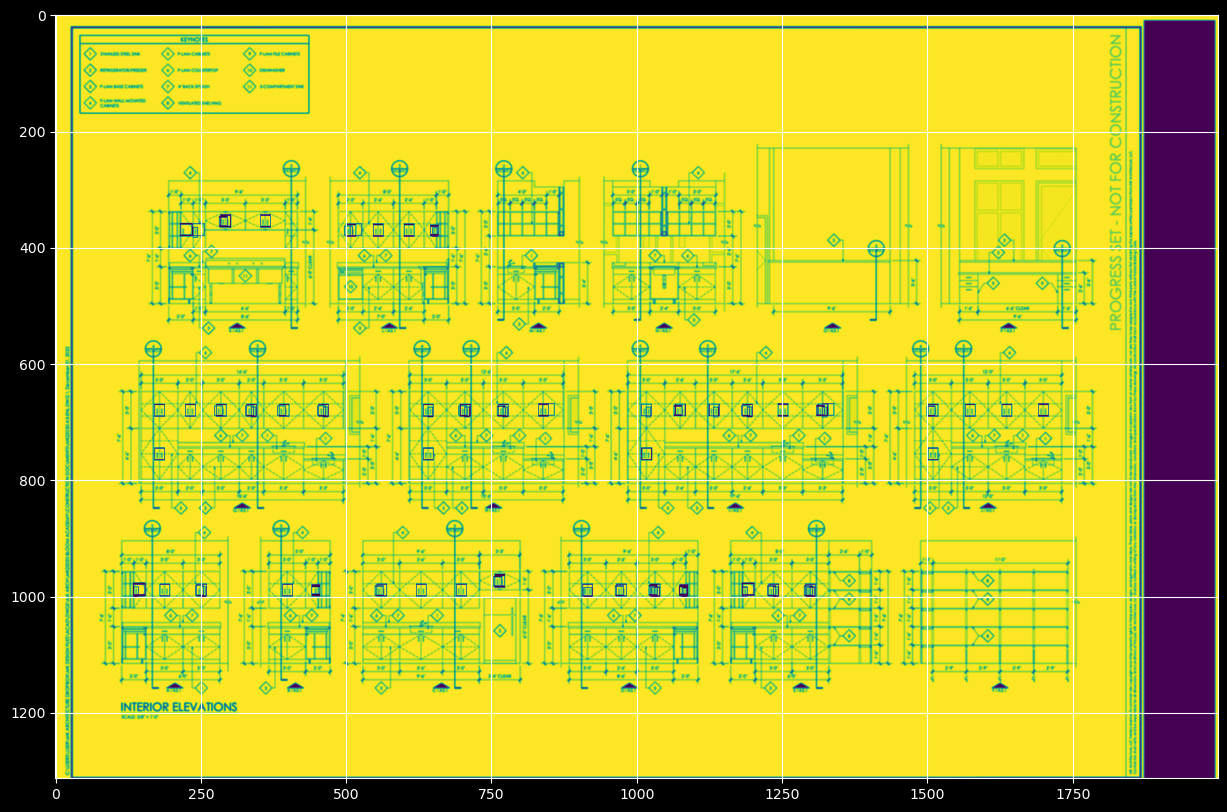

In [226]:
# img_original = img.copy()

# w, h = pat.shape[::-1]
# loc = find_pattern(img_original, pat)
# for pt in zip(*loc[::-1]):
#     cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), 0, 1)

# w_right, h_right = pat_right.shape[::-1]
# loc_right = find_pattern(img_original, pat_right)
# for pt in zip(*loc_right[::-1]):
#     cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), 0, 1)

# w_left, h_left = pat_right.shape[::-1]
# loc_left = find_pattern(img_original, pat_left)
# for pt in zip(*loc_left[::-1]):
#     cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), 0, 1)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.grid(True)
plt.show()

In [227]:
points = np.array(locs)
dbscan = DBSCAN(eps=20, min_samples=1)
labels = dbscan.fit_predict(points)

In [232]:
to_drop = set()
for i, pt1 in enumerate(locs):
    if labels[i] in to_drop:
        continue
    for j, pt2 in enumerate(locs):
        if pt1 == pt2 or labels[j] in to_drop:
            continue
        
        if abs(pt1[0] - pt2[0]) < 5 and abs(pt1[1] - pt2[1]) < 150 and labels[i] != labels[j]:
            to_drop |= {labels[i], labels[j]}

In [233]:
len(to_drop)

8

In [239]:
unique_cabs = []
for label in np.unique(labels):
    if label in to_drop:
        continue
    unique_cabs.append(list(points[np.where(labels == label)[0]].mean(axis=0).round()))
unique_cabs = np.array(unique_cabs, dtype=np.int16)[..., ::-1]

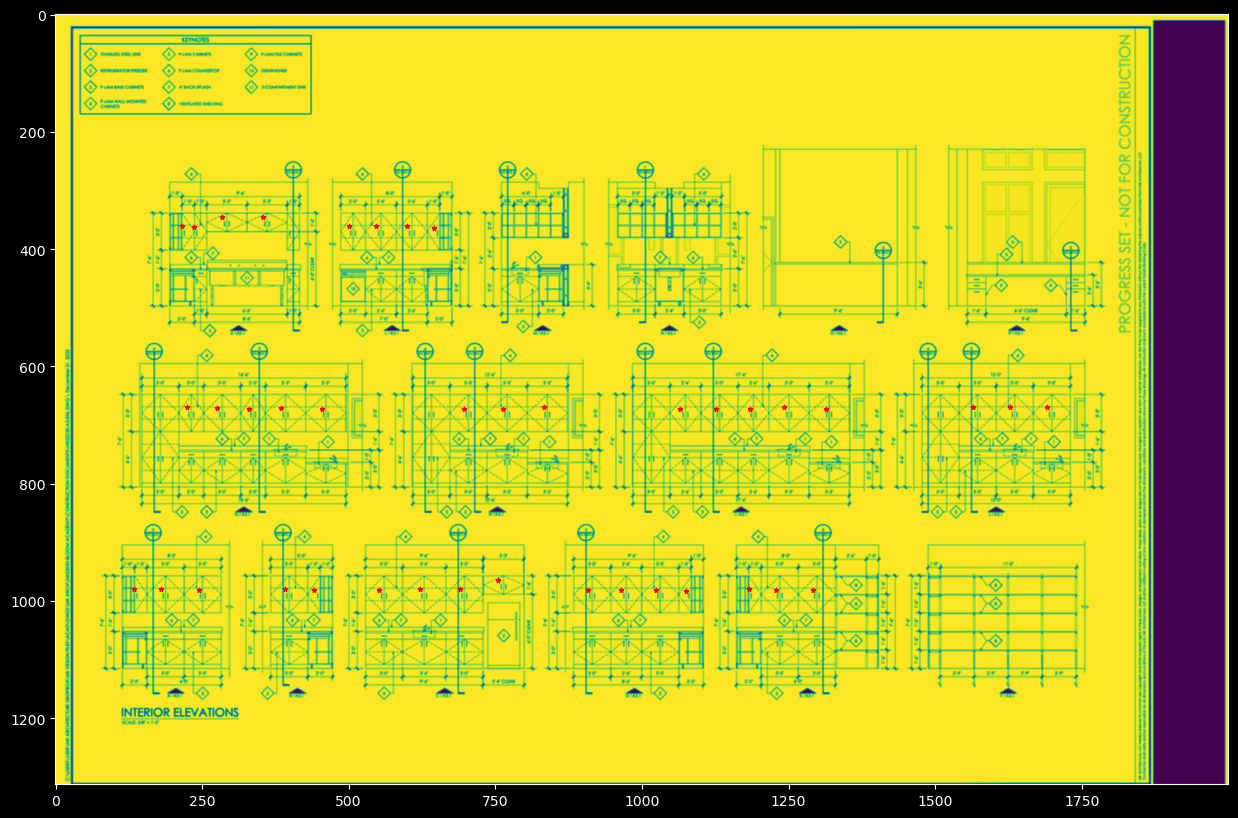

In [240]:
plt.figure(figsize=(20, 10))
plt.scatter(unique_cabs[:, 1], unique_cabs[:, 0], 10, 'red', '*')
plt.imshow(img_original);